In [157]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='karthikziffer', api_key='***************')
plotly.offline.init_notebook_mode(connected= True)



In [2]:
df = pd.read_csv('white-house-salaries.csv')
df.head()

,employee_name,salary,position,year,status,party,president,term,gender
0,"abraham, yohannes a",40000,legislative assistant and assistant to the hou...,2009,employee,democrat,obama,first,male
1,"abrams, adam w",65000,western regional communications director,2009,employee,democrat,obama,first,male
2,"adams, ian h",36000,executive assistant to the director of schedul...,2009,employee,democrat,obama,first,male
3,"agnew, david p",92000,deputy director of intergovernmental affairs,2009,employee,democrat,obama,first,male
4,"ahrens, rebecca a",42800,operator,2009,employee,democrat,obama,first,female


## Employee - Part Time Salary 

In [3]:
dfEmployeePT = df[df['status'] == 'employee (part-time)'][['employee_name' ,'salary' , 'gender']].reset_index(drop = True)
empnamesPT = []
dfEmployeePT['employee_name'].apply(lambda x : empnamesPT.append(x.split(',')[0:2]))


empName_Salary = {empnamesPT[0][0] : dfEmployeePT['salary'][0] , 
                  empnamesPT[0][1] : dfEmployeePT['salary'][0] ,
                  empnamesPT[1][0] : dfEmployeePT['salary'][1] , 
                  empnamesPT[1][1] : dfEmployeePT['salary'][1] }

print(empName_Salary)

{'jolin': 50000, ' michele m': 50000, 'leitner-laserna': 21000, ' sofia i': 21000}


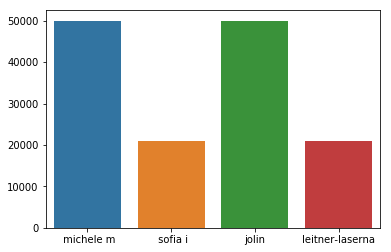

In [4]:
lists = sorted(empName_Salary.items())
x , y = zip(*lists)
sb.barplot(x,y)
plt.show()

## Yearly Average Gender Pay 

In [150]:
yearPay = df.groupby(['gender' , 'year'] , as_index= False).mean()

yearPay

,gender,year,salary
0,female,2001,51204.578947
1,female,2003,55657.013158
2,female,2004,55657.013158
3,female,2005,59580.292793
4,female,2006,60437.581081
5,female,2007,61666.703883
6,female,2008,64299.650943
7,female,2009,77205.759657
8,female,2010,80731.372727
9,female,2011,77617.306220


In [147]:
heatmpFemale = go.Heatmap(z = [yearPay['salary'][:16]]  ,
                   x = ['2001' , '2003' ,'2004' ,'2005' ,'2006' ,
                       '2007' , '2008' , '2009' , '2010' ,
                       '2011' , '2012' , '2013' , '2014' ,
                       '2015' , '2016' , '2017' ] , 
                   y = ['female' ])


data = [heatmpFemale]
py.iplot(data)

    gender  year         salary
0   female  2001   51204.578947
1   female  2003   55657.013158
2   female  2004   55657.013158
3   female  2005   59580.292793
4   female  2006   60437.581081
5   female  2007   61666.703883
6   female  2008   64299.650943
7   female  2009   77205.759657
8   female  2010   80731.372727
9   female  2011   77617.306220
10  female  2012   76682.850679
11  female  2013   79499.995595
12  female  2014   78598.547085
13  female  2015   81020.810484
14  female  2016   82026.305556
15  female  2017   84509.813665
16    male  2001   65643.531915
17    male  2003   76958.608696
18    male  2004   76958.608696
19    male  2005   70580.637838
20    male  2006   71732.833333
21    male  2007   77198.745690
22    male  2008   83240.404255
23    male  2009   83300.314961
24    male  2010   84479.538153
25    male  2011   85303.861224
26    male  2012   84565.502024
27    male  2013   85035.540773
28    male  2014   86907.506438
29    male  2015   89081.566372
30    ma

In [149]:
heatmpMale = go.Heatmap(z = [yearPay['salary'][16:32]]  ,
                   x = ['2001' , '2003' ,'2004' ,'2005' ,'2006' ,
                       '2007' , '2008' , '2009' , '2010' ,
                       '2011' , '2012' , '2013' , '2014' ,
                       '2015' , '2016' , '2017' ] , 
                   y = ['male'])


data = [heatmpMale]
py.iplot(data)

## President Wise Average Gender Pay

In [6]:
df.groupby(['president' ,'gender' ,  'year']).mean()

salary
president gender year               
bush      female 2001   51204.578947
                 2003   55657.013158
                 2004   55657.013158
                 2005   59580.292793
                 2006   60437.581081
                 2007   61666.703883
                 2008   64299.650943
          male   2001   65643.531915
                 2003   76958.608696
                 2004   76958.608696
                 2005   70580.637838
                 2006   71732.833333
                 2007   77198.745690
                 2008   83240.404255
obama     female 2009   77205.759657
                 2010   80731.372727
                 2011   77617.306220
                 2012   76682.850679
                 2013   79499.995595
                 2014   78598.547085
                 2015   81020.810484
                 2016   82026.305556
          male   2009   83300.314961
                 2010   84479.538153
                 2011   85303.861224
                 2012   84565.502024
                 2013   85035.540773
                 2014   86907.506438
                 2015   89081.566372
                 2016   86740.554545
trump     female 2017   84509.813665
          male   2017  102595.666667

## Party Gender Hiring

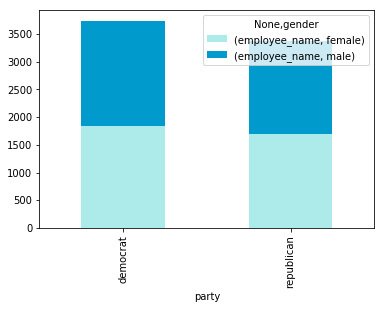

In [73]:
partGender = df.groupby(['party' , 'gender']).count()[['employee_name']]

partGender.unstack().plot(kind = 'bar' , stacked = True , color = [ '#ADEAEA' , '#009ACD'] , grid = False )

## Histogram Plot for Year 2017

In [153]:
topEarners = df[df['year'] == 2017][['salary' , 'gender']].sort_values('salary').reset_index(drop = True)
topEarnersMale = topEarners[topEarners['gender'] == 'male']
topEarnersFemale = topEarners[topEarners['gender'] == 'female']

female = go.Histogram(x = topEarnersFemale['salary'] , name = 'female salary' , marker=dict(
        color='#00FFFF')
    )
male = go.Histogram( x = topEarnersMale['salary'] , name = 'male salary' , marker=dict(
        color='#007FFF'
    ))

data = [female , male]
layout = go.Layout(barmode = 'stack')
fig = go.Figure(data = data , layout = layout)

py.iplot(fig , filename = 'Male Female Salary Stacked Histogram')



## Styled Histogram

In [154]:
male = go.Histogram(
    x = topEarnersMale['salary'],
    histnorm='count',
    name='male',
    marker=dict(
        color='#00FFFF',
    ),
    opacity=0.75
    )


female = go.Histogram(
    x = topEarnersFemale['salary'],
    name='female',
    marker=dict(
        color='#007FFF'
    ),
    opacity=0.75
)


data = [male , female]

layout = go.Layout(
    title='Gender Pay',
    xaxis=dict(
        title='Gender'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

## Cumulative Histogram

In [155]:
data = [go.Histogram(x=df['salary'], cumulative=dict(enabled=True))]

py.iplot(data, filename='Cumulative Histogram of Salary')